# Introduction

Name      : Sigit Pramana

Objective   : Berdasarkan dataset yang diambil dari https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset?datasetId=798706&sortBy=voteCount saya ingin mengetahui data penjualan yang terjadi selama tahun 2013, mulai dari berapa banyak user, jumlah transaksi, profitnya, dan lain-lain.

# Problem Statement

1. Berapakah jumlah user yang melakukan transaksi setiap bulannya pada tahun 2013 ?

2. Berapa rata-rata jumlah transaksi yang terjadi setiap bulannya pada tahun 2013?

3. Berapa rata-rata profit setiap bulannya pada tahun 2013?

4. Ada berapa tipe user (segment) yang transaksi selama tahun 2013 dan berapa profit yang di hasilkan oleh setiap segment user tersebut ?

5. Kategori produk apa saja yang menghasilkan profit pada tahun 2013 dan berapa profitnya?

6. Market mana yang menghasilkan profit terbanyak selama tahun 2013 ?

7. Apa saja jenis pengiriman yang digunakan pada transaksi di tahun 2013 dan jenis pengiriman apa yanng paling sering digunakan ?

8. Berapa rata-rata lama waktu pengiriman hingga barang sampai pada customer?

9. Apakah pendapatan (profit) setiap bulannya mencapai 50.000 dolar ? Tunjukkan uji statistiknya !

# Import Libraries

In [72]:
# import ibraries

import pandas as pd
import calendar
from scipy.stats import ttest_1samp
import datetime as dt
import matplotlib.pyplot as plt

# Data Loading

In [73]:
# load data

data = pd.read_csv("C:/Users/MyBook Z Series/Documents/Global_Superstore2.csv",encoding='iso-8859-1')

In [74]:
# melihat informasi 5 baris awal data

data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [75]:
# melihat informasi 5 baris akhir data

data.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium
51289,6147,MX-2012-134460,22-05-2012,26-05-2012,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.00,High


In [76]:
# melihat tipe data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

- Dataset terdiri dari 51290 baris dan 24 kolom

# Data Preprocessing

In [77]:
# mengecek missing value (data yang hilang/tidak ada isinya)

data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

- Dari hasil diatas missing value hanya terdapat pada kolom postal code, ini tidak terlalu berpebgaruh terhadap pemrosesan data nantinya, sehingga saya memutuskan untuk membiarkan saja missing value tersebut

In [78]:
# mengubah tipe data 'Order Date' menjadi data date

data[['order_day','order_month','order_year']] = data['Order Date'].str.split('-', expand=True)
data['Order Date'] = data['order_year'] + '/' + data['order_month'] + '/' + data['order_day']
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [79]:
# menngubah 'Ship Date' menjadi data date

data[['ship_day','ship_month','ship_year']] = data['Ship Date'].str.split('-', expand=True)
data['Ship Date'] = data['ship_year'] + '/' + data['ship_month'] + '/' + data['ship_day']
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [80]:
# menghapus kolom tambahan pada data

data.drop(columns=['order_day','order_month','order_year','ship_day','ship_month','ship_year'], inplace=True)

In [81]:
# mengubah jenis data pada kolom

data['Ship Mode'] = data['Ship Mode'].astype('category')
data['Segment'] = data['Segment'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Market'] = data['Market'].astype('category')
data['Region'] = data['Region'].astype('category')
data['Category'] = data['Category'].astype('category')
data['Sub-Category'] = data['Sub-Category'].astype('category')
data['Order Priority'] = data['Order Priority'].astype('category')

In [82]:
# menambah kolom 'Order_year' untuk nantinya memfiliter data

data['Order_year'] = data['Order Date'].dt.year

In [83]:
# membuat data penjualan pada tahun 2013 saja

data_2013 = data[(data['Order_year'] == 2013 )]
data_2013.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_year
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.765,923.63,Critical,2013
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.971,915.49,Medium,2013
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.540,910.16,Medium,2013
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.520,903.04,Critical,2013
5,22732,IN-2013-42360,2013-06-28,2013-07-01,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.275,897.35,Critical,2013


# Explore Data Analysis

## Problem 1

In [84]:
# mencari user yang bertransaksi setiap bulannya

data_2013.groupby(data_2013['Order Date'].dt.to_period('M'))['Customer ID'].nunique()

Order Date
2013-01    297
2013-02    266
2013-03    341
2013-04    336
2013-05    405
2013-06    550
2013-07    365
2013-08    534
2013-09    594
2013-10    433
2013-11    580
2013-12    587
Freq: M, Name: Customer ID, dtype: int64

C:\Users\MyBook Z Series\AppData\Local\Temp\ipykernel_1600\517851933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2013['Order Date'] = pd.to_datetime(data_2013['Order Date'])


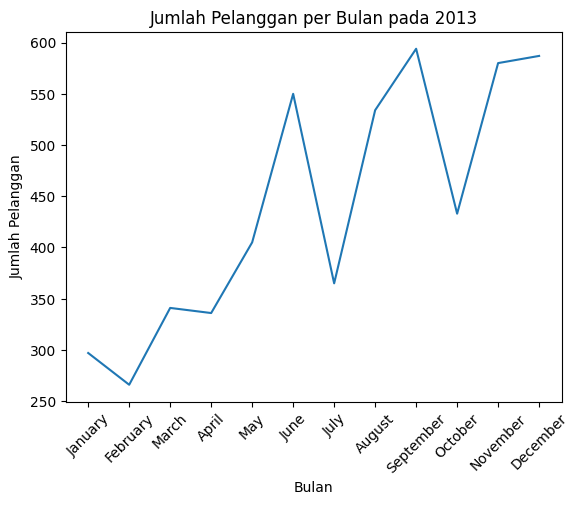

In [85]:
# membuat chartnya

data_2013['Order Date'] = pd.to_datetime(data_2013['Order Date'])
customer_count = data_2013.groupby(data_2013['Order Date'].dt.to_period('M'))['Customer ID'].nunique().reset_index()
customer_count['Order Date'] = customer_count['Order Date'].apply(lambda x: calendar.month_name[x.month])

plt.plot(customer_count['Order Date'], customer_count['Customer ID'])
plt.xticks(rotation=45)
plt.title('Jumlah Pelanggan per Bulan pada 2013')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Jumlah user yang bertransaksi setiap bulannya mengalami kenaikan

## Problem 2

In [86]:
# mengetahui jumlah transaksi yang terjadi setiap bulannya

data_2013.groupby(data_2013['Order Date'].dt.to_period('M'))['Order ID'].count()

Order Date
2013-01     709
2013-02     605
2013-03     766
2013-04     785
2013-05    1057
2013-06    1530
2013-07     925
2013-08    1442
2013-09    1682
2013-10    1100
2013-11    1596
2013-12    1602
Freq: M, Name: Order ID, dtype: int64

C:\Users\MyBook Z Series\AppData\Local\Temp\ipykernel_1600\570089575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2013['Order Date'] = pd.to_datetime(data_2013['Order Date'])


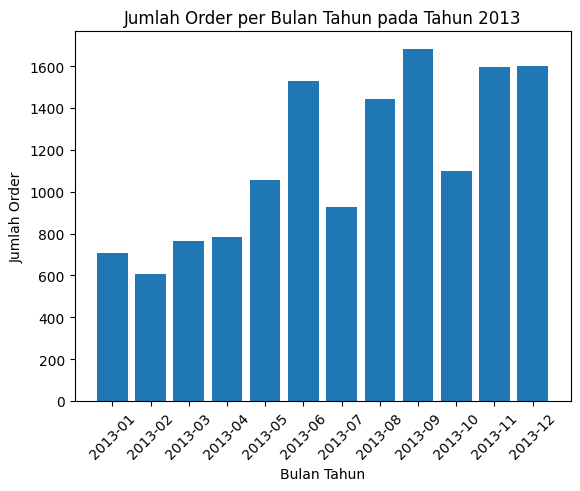

In [87]:
# membuat chartnya

data_2013['Order Date'] = pd.to_datetime(data_2013['Order Date'])
monthly_order_count = data_2013.groupby(data_2013['Order Date'].dt.to_period('M'))['Order ID'].count()

plt.bar(monthly_order_count.index.astype(str), monthly_order_count)
plt.xticks(rotation=45)
plt.xlabel('Bulan Tahun')
plt.ylabel('Jumlah Order')
plt.title('Jumlah Order per Bulan Tahun pada Tahun 2013')
plt.show()

Jumlah transaksi perbulannya mengalammi kenaikan, dengan jumlah order terbanyak terjadi pada bulan september 2013

In [88]:
# mencari rata-rata jumlah transaksi setiap bulannya

monthly_order_count.mean()

1149.9166666666667

Rata rata jumlah transaksi setiap bulannya adalah 1150 orderan

## Problem 3

In [89]:
# mencari total profit tiap bulannya pada tahun 2013

data_2013.groupby(data_2013['Order Date'].dt.to_period('M'))['Profit'].sum()

Order Date
2013-01    26810.55968
2013-02    23762.49610
2013-03    23433.77462
2013-04    19462.03844
2013-05    28495.69410
2013-06    45478.41340
2013-07    28863.82720
2013-08    31023.66846
2013-09    38905.66778
2013-10    42433.22258
2013-11    48062.99670
2013-12    50202.87112
Freq: M, Name: Profit, dtype: float64

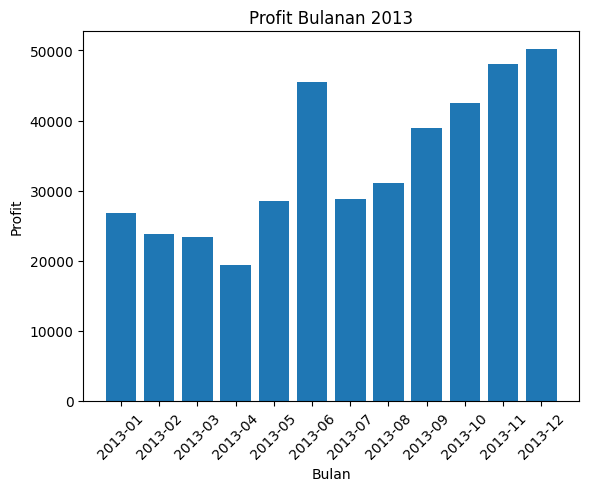

In [90]:
# membuat chartnya

monthly_profit = data_2013.groupby(data_2013['Order Date'].dt.to_period('M'))['Profit'].sum()

plt.bar(monthly_profit.index.astype(str), monthly_profit.values)

plt.title('Profit Bulanan 2013')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Profit')
plt.show()

Profit tiap bulannya mengalami kenaikan, walaupun sempat mengalami penurunan pada bulan April, dan profit terbanyak di dapat pada bulan Desember

In [91]:
# mencari rata-rata profit setiap bulannya

monthly_profit.mean()

33911.26918166667

Rata-rata profit yang di hasilkan setiap bulannya adalah 33911 dolar

## Problem 4

In [92]:
# mencari profit berdasarkan segment user yang bertransaksi

data_2013.groupby(data_2013['Segment'])['Profit'].sum()

Segment
Consumer       208427.73398
Corporate      125707.93908
Home Office     72799.55712
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Total Profit by Segment in 2013')

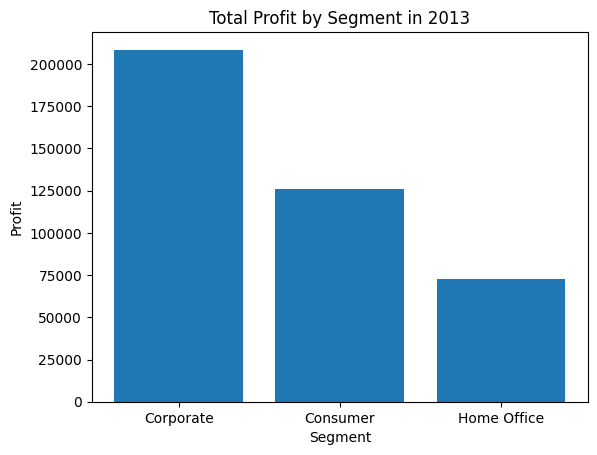

In [93]:
# membuat chartnya

plt.bar(data_2013['Segment'].unique(), data_2013.groupby(data_2013['Segment'])['Profit'].sum())

plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Total Profit by Segment in 2013')

Ada 3 kategori produk yang terjual selama 2013, yaitu Furniture, Technology, dan Office Supplies. Pendapatan terbanyak didapatkan oleh segment Corporate.

## Problem 5

In [94]:
# mencari profit berdasarkan kategori produk

data_2013.groupby(data_2013['Category'])['Profit'].sum()

Category
Furniture           84062.90050
Office Supplies    149245.73580
Technology         173626.59388
Name: Profit, dtype: float64

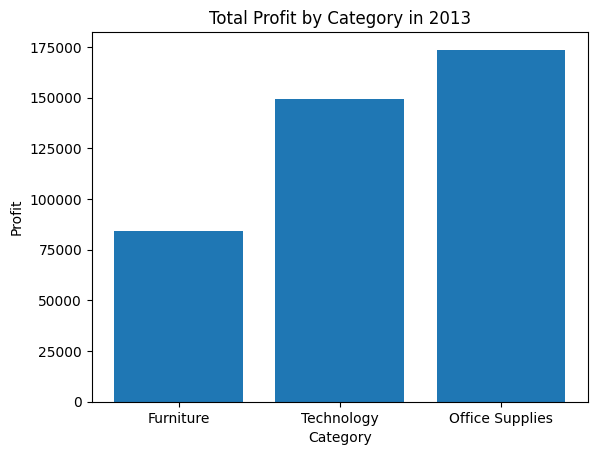

In [95]:
# membuat chart

plt.bar(data_2013['Category'].unique(), data_2013.groupby(data_2013['Category'])['Profit'].sum())

plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Total Profit by Category in 2013')

plt.show()

Kategori Office Supplies mendapatkan profit tertinggi selama 2013

## Problem 6

In [96]:
# mencari profit berdasarkan marketnya

data_2013.groupby(data_2013['Market'])['Profit'].sum()

Market
APAC      123103.12590
Africa     26687.11200
Canada      5129.46000
EMEA       10598.04300
EU         98275.18500
LATAM      61415.37348
US         81726.93080
Name: Profit, dtype: float64

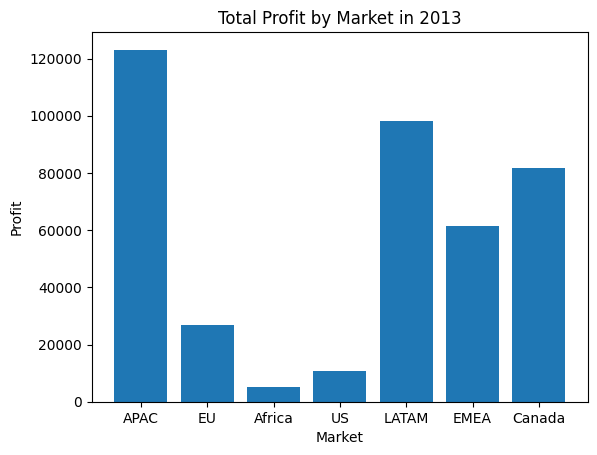

In [97]:
# membuat chartnya

plt.bar(data_2013['Market'].unique(), data_2013.groupby(data_2013['Market'])['Profit'].sum())

plt.xlabel('Market')
plt.ylabel('Profit')
plt.title('Total Profit by Market in 2013')

plt.show()

Profit terbanyak berada pada market APAC (Asian Pacific)

## Problem 7

In [98]:
# mencari jenis pengiriman

data_2013.groupby(data_2013['Ship Mode'])['Order ID'].count()

Ship Mode
First Class       1958
Same Day           749
Second Class      2838
Standard Class    8254
Name: Order ID, dtype: int64

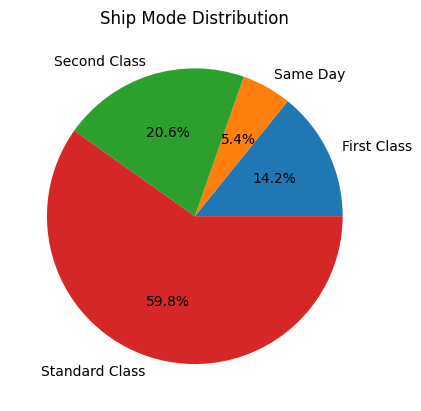

In [99]:
# membuat chartnya

ship_mode_counts = data_2013.groupby('Ship Mode')['Order ID'].count()
labels = ship_mode_counts.index.tolist()
values = ship_mode_counts.tolist()

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Ship Mode Distribution')
plt.show()


Jenis pengiriman yang ssering digunakan adalah standard classs

## Problem 8

In [100]:
# mencari lama waktu pengiriman

lama_pengiriman = data_2013['Ship Date']-data_2013['Order Date']

In [101]:
# rata-rata waktu pengiriman

lama_pengiriman.mean()

Timedelta('3 days 23:33:29.623885788')

rata rata lama pengiriman hingga orderan sampai pada customer adalah 4 hari sejak barang dikirim

## Problem 9

In [102]:
# membuat data profit bulanan

profit_bulanan = data_2013.groupby(data_2013['Order Date'].dt.to_period('M'))['Profit'].sum()

Menggunakan One Sample Two Tailed, kita asumsikan
H0: μ =$50000 dan H1: μ != $50000

In [103]:
# mencari t_statistik dan p_value

t_statistic, p_value = ttest_1samp(profit_bulanan, 50000)

print('T-Statistic: ', t_statistic)
print('P-Value: ', p_value)

T-Statistic:  -5.265902752353453
P-Value:  0.00026599008527100024


Dari hasil perhitungan diatas karena p_valuenya kurang dari 0,05 maka dapat disimpulkan bahwa tolak H0, ini artinya pendapatan tiap bulannya tidak mencapai 50.000 dolar, atau tidak sama dengan 50.000 dolar

# Conclusion

Berdasarkan problem statement yang telah dijabarkan pada problem 1 sampai problem 9 dapat diambil kesimpulan bahwa transaski pada tahun 2013 mendapatkan profit yang cukup baik, walupun jumlah user, jumlah transaksi, dan profit tiap bulannya naik turun, namun seacara keseluruhan masih menunjukan trend positif. Untuk mempermudah visualisasi data, saya sudah cantumkan dashbord untuk melihat keseluruhan data.

# Dashboard

Link : https://lookerstudio.google.com/reporting/86db71e2-6780-4271-b1cd-f2da8c80464d